In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
import sys
sys.path.append("../subjective-fits/")
import seaborn as sns
figsize(8,6)

Populating the interactive namespace from numpy and matplotlib


In [2]:
mpl.rcParams['xtick.labelsize'] = 22
mpl.rcParams['ytick.labelsize'] = 22
plt.rc('axes', labelsize=22)
plt.rc('legend', fontsize=22)
mpl.rcParams['ps.useafm'] = True
mpl.rcParams['pdf.use14corefonts'] = True
mpl.rcParams['text.usetex'] = True

# Comparing approaches to subjective probability and statistics

We illustrate various approaches to statistics based on subjective probability. Our test case is the estimation of the mean of a one-dimensional Gaussian. We will demonstrate each approach to subjective probability using one point estimate and one "uncertainty" interval. We will also comment on the mathematical derivation as well as the interpretation of these two outputs differ for each approach.

The setting is $x_1,\dots,x_N\sim\mathcal{N}(\mu,\sigma^2)$, with $\sigma^2$ known. The statistician's goal is to infer $\mu$, and state his uncertainty about his estimate. 

In [3]:
def generateData(N, mu, sigma2, tag="well-specified"):
    if tag=="well-specified":
        return mu+np.sqrt(sigma2)*npr.randn(N)

In [4]:
npr.seed(1)
muTrue = 1
sigma2True = 1
alpha = .05
gamma = 1 # importance of the length of the interval vs. the interval containing the true value
N = 100
x = generateData(N, muTrue, sigma2True)

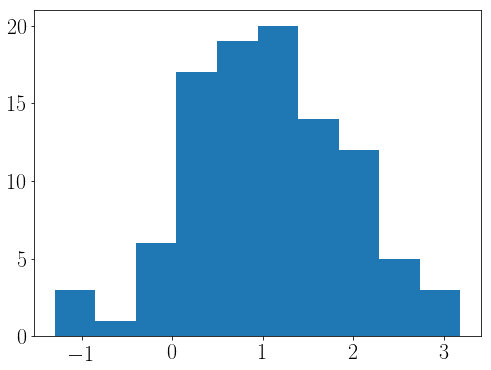

In [5]:
plt.hist(x)
plt.show()

## Conjugate Bayes

TODO: Describe here the Bayesian approach, including the cost function

In [6]:
import ConjugateBayes as cb
cb = cb.ConjugateBayes(data=x, sigma2Lhd=sigma2True**2, muPrior=10, sigma2Prior=10)

In [ ]:
#Each approaches should be implemented in one class, in a separate python file. Each approach should have the following two methods:
print(cb.estimate()) # yields a point estimate, here the posterior mean
print(cb.interval(1-alpha)) # yields an uncertainty quantification, here a credible interval of posterior mass 1-alpha

Now among centered intervals, I want to pick the one with the best integrated cost 
$$\int \left(\gamma \vert I\vert + 1_{\theta\notin I}\right) p(\theta\vert x)d\theta = \gamma \vert I\vert + \alpha$$

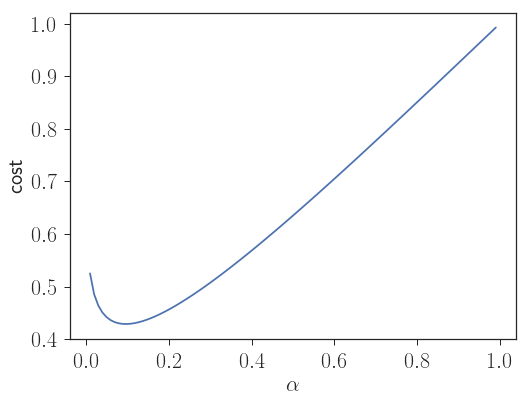

In [65]:
alphas = np.linspace(0.01,.99, 100)
costs = []
for alpha  in alphas:
    lo, hi = cb.interval(1-alpha)
    costs.append( gamma*(hi-lo) + alpha )

plt.plot(alphas, costs)
plt.xlabel(r"$\alpha$")
plt.ylabel("cost")
plt.show()

The Bayes action is to report the credible interval with $\alpha$ set to the minizer of this curve!